## Exercise 5
$$\large \textbf{Logistic Regression with Regularization}$$

In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
x = np.loadtxt('./ex5Data/ex5Logx.dat', delimiter=',', dtype=np.float32)
y = np.loadtxt('./ex5Data/ex5Logy.dat', dtype=np.float32)

In [26]:
x.shape

(117, 2)

In [27]:
y.shape

(117,)

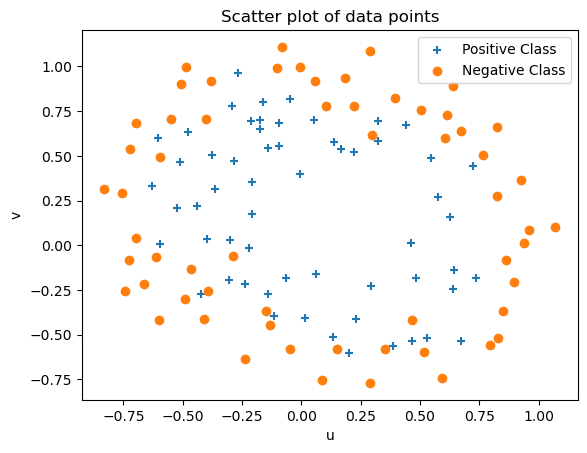

In [28]:
pos = np.where(y == 1)
neg = np.where(y == 0)

plt.scatter(x[pos, 0], x[pos, 1], marker='+', label='Positive Class')
plt.scatter(x[neg, 0], x[neg, 1], marker='o', label='Negative Class')
plt.xlabel('u')
plt.ylabel('v')
plt.legend()
plt.title('Scatter plot of data points')
plt.show()

In [29]:
def map_feature(u, v):
    degree = 6  # Define the degree of polynomial features
    out = np.ones(len(u)).reshape(-1, 1)  # Initialize output array with ones
    for i in range(1, degree + 1):  # Iterate over each degree up to 6
        for j in range(i + 1):  # Iterate over each possible power combination
            # Compute the higher-order feature and concatenate it to the output array
            out = np.hstack((out, (u ** (i - j) * v ** j).reshape(-1, 1)))
    return out

In [30]:
def hypothesis(X, theta):
    return 1/(1 + np.exp(-np.dot(X, theta)))

In [31]:
# def cost_function_reg(X, y, theta, lam):
#     m = len(y)
#     h = hypothesis(X, theta)
#     reg_term = (lam / (2 * m)) * np.sum(theta[1:] ** 2)
#     return (-1 / m) * (np.dot(y.T, np.log(h)) + np.dot((1 - y).T, np.log(1 - h))) + reg_term

def cost_function_reg(X, y, theta, lam):
    m = len(y)
    h = hypothesis(X, theta)
    epsilon = 1e-10  # Small epsilon value
    reg_term = (lam / (2 * m)) * np.sum(theta[1:] ** 2)
    return (-1 / m) * (np.dot(y.T, np.log(h + epsilon)) + np.dot((1 - y).T, np.log(1 - h + epsilon))) + reg_term

In [32]:
len(y)

117

In [33]:
def gradient_reg(X, y, theta, lam):
    m = len(y)
    h = hypothesis(X, theta)
    reg_term = (lam / m) * theta
    reg_term[0] = 0  # No regularization for bias term
    return (1 / m) * np.dot(X.T, h - y) + reg_term

In [34]:
def newtons_method(X, y, theta, lam, max_iters=15):
    m = len(y)
    costVal = []
    epochs = []

    for i in range(max_iters):
        cost = cost_function_reg(X, y, theta, lam)
        grad = gradient_reg(X, y, theta, lam)
        h_theta = hypothesis(X, theta)
        diagonal = h_theta * (1 - h_theta)
        Hessian = (1 / m) * np.dot(X.T, np.dot(np.diag(diagonal), X)) + (lam / m) * np.eye(len(theta))
        theta -= np.linalg.inv(Hessian).dot(grad)
        costVal.append(cost)
        epochs.append(i)
        
    return theta, costVal, epochs

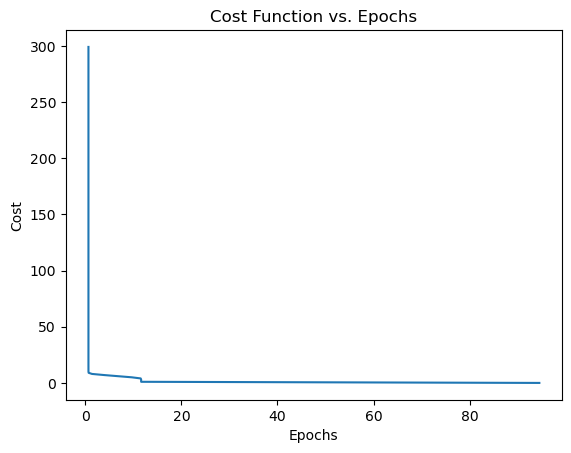

In [35]:
for i, lambda_val in enumerate(lambda_vals):
    _, costVal, epochs = newtons_method(X, y, theta_init, lambda_val, 300)
plt.plot(costVal, epochs)
plt.title("Cost Function vs. Epochs")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()

In [44]:
# Initializations
X = map_feature(x[:, 0], x[:, 1])
theta_init = np.zeros(X.shape[1])
lambda_vals = [0, 9, 10]

For Lambda = 0:
Optimal theta: [   26.78217928    20.08469531    68.34309783  -319.82192094
  -151.49251403  -107.11019639  -133.26299863  -479.49080342
  -399.36830742  -365.87044802  1312.02815222  1350.45867481
  1351.55179022   557.87949276   272.73709141   353.32856669
  1084.0604628   1373.40887038  1661.47552812  1136.53414395
   619.7730142  -1505.01472123 -2291.88043623 -3343.81522799
 -3116.90307417 -2646.26841324 -1299.74651909  -527.78992091]
Final Cost: 0.19983726513085112



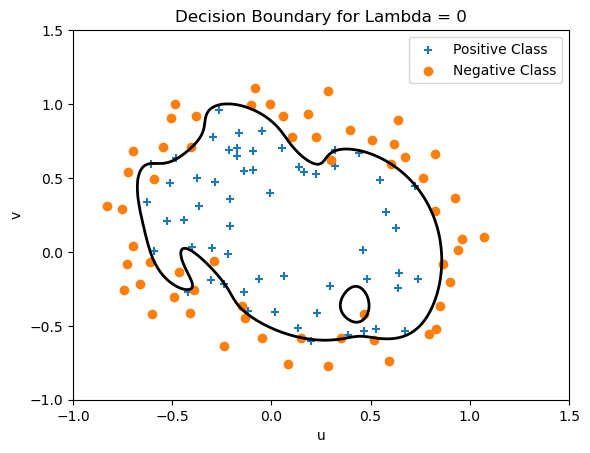

For Lambda = 9:
Optimal theta: [ 0.37413576  0.01960939  0.1854348  -0.48163385 -0.12440898 -0.31459213
 -0.06793371 -0.06421119 -0.07455739 -0.11218424 -0.36668294 -0.01446552
 -0.13034763 -0.03139823 -0.313029   -0.12403481 -0.04096007 -0.02555359
 -0.05356772 -0.04725189 -0.19919743 -0.27763074 -0.00311868 -0.06458465
 -0.0005862  -0.07019946 -0.01371035 -0.29335716]
Final Cost: 0.6440629187799531



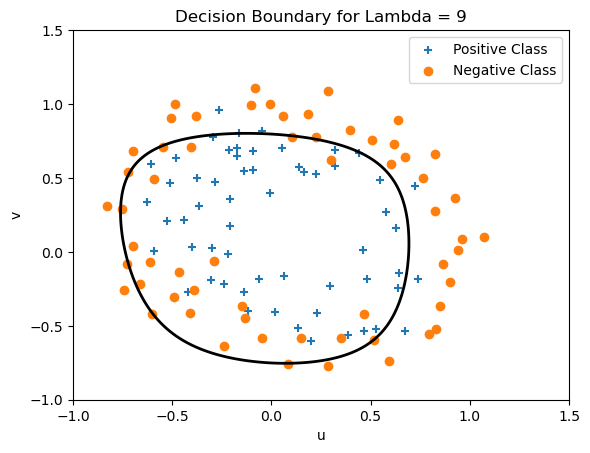

For Lambda = 10:
Optimal theta: [ 0.34739681  0.00932067  0.16347325 -0.44227081 -0.11256354 -0.28970135
 -0.06766223 -0.05880069 -0.06835876 -0.10758702 -0.33766442 -0.01341784
 -0.11923118 -0.02831858 -0.28998165 -0.11751901 -0.0374963  -0.02380563
 -0.04911808 -0.04294791 -0.18744185 -0.25646481 -0.00317254 -0.05910708
 -0.00062841 -0.06437231 -0.01232483 -0.27312305]
Final Cost: 0.6475839584108528



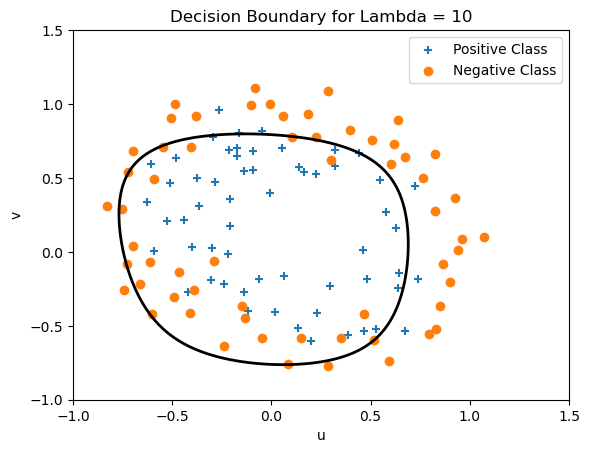

In [45]:
# Run Newton's method for different lambdas
for i, lambda_val in enumerate(lambda_vals):
    theta_opt, J_history, _= newtons_method(X, y, theta_init, lambda_val)
    print(f"For Lambda = {lambda_val}:")
    print(f"Optimal theta: {theta_opt}")
    print(f"Final Cost: {J_history[-1]}")
    print()

    # Plotting decision boundary
    u = np.linspace(-1, 1.5, 200)
    v = np.linspace(-1, 1.5, 200)
    z = np.zeros((len(u), len(v)))

    for i, ui in enumerate(u):
        for j, vj in enumerate(v):
            z[i, j] = np.dot(map_feature(np.array([ui]), np.array([vj])), theta_opt)

    plt.contour(u, v, z.T, levels=[0], colors='k', linewidths=2)
#     plt.contour(u, v, z.T, levels=[0.5], colors='k', linewidths=2)

    plt.scatter(x[pos, 0], x[pos, 1], marker='+', label='Positive Class')
    plt.scatter(x[neg, 0], x[neg, 1], marker='o', label='Negative Class')
    plt.xlabel('u')
    plt.ylabel('v')
    plt.legend()
    plt.title(f'Decision Boundary for Lambda = {lambda_val}')
    plt.show()